<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF51_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/imori.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/imori_part.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/seg.png
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/thorino.jpg
  
from google.colab.patches import cv2_imshow

--2019-04-30 12:19:34--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-04-30 12:19:34 (96.9 MB/s) - ‘imori.jpg’ saved [12638/12638]

--2019-04-30 12:19:35--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_51_60/imori_part.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 993 [image/jpe

#51 モルフォロジー勾配
大津の二値化→モルフォロジー勾配（モルフォロジ０膨張と収縮の画像の差分を取る）
###物体の境界線を抽出できる

threshold = 127


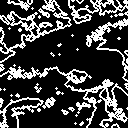

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

#大津の二値化
out = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
out = out.astype(np.float32)

max_sigma = 0
max_t = 0
for _t in range(1, 255):
    v0 = out[np.where(out < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0  = len(v0) / (H * W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * (m0 - m1) ** 2
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

##二値化
print("threshold = " +  str(max_t))
th = max_t
out[out < th] = 0
out[out >= th] = 255

#モルフォロジー処理
dil_time = 1
ero_time = 1
MF = np.array(((0, 1, 0), 
                       (1, 0, 1),
                       (0, 1, 0)), dtype=np.int)

dil = out.copy()
ero = out.copy()

for i in range(dil_time):
    #収縮
    tmp = np.pad(out, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                dil[y-1, x-1] = 0
                
for i in range(ero_time):
    #膨張
    tmp = np.pad(out, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                ero[y-1, x-1] = 255

out = np.abs(dil - ero) * 255
                
cv2_imshow(out)

#52 トップハット変換
大津の二値化→トップハット変換（元画像からオープニング処理された画像を差し引いたもの）

###細い線状のものやノイズなどを抽出できる

threshold = 127


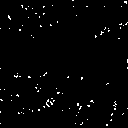

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

#大津の二値化
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
out = gray.astype(np.float32)

max_sigma = 0
max_t = 0
for _t in range(1, 255):
    v0 = out[np.where(out < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0  = len(v0) / (H * W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * (m0 - m1) ** 2
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

##二値化
print("threshold = " +  str(max_t))
th = max_t
out[out < th] = 0
out[out >= th] = 255

#オープニング処理

#モルフォロジー処理
dil_time = 3
ero_time = 3
MF = np.array(((0, 1, 0), 
                       (1, 0, 1),
                       (0, 1, 0)), dtype=np.int)
mor = out.copy()


for i in range(dil_time):
    #収縮
    tmp = np.pad(out, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mor[y-1, x-1] = 0
                
for i in range(ero_time):
    #膨張
    tmp = np.pad(mor, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mor[y-1, x-1] = 255
                
out = out - mor

cv2_imshow(out)

#53 ブラックハット変換
大津の二値化→ブラックハット変換（クロージング画像から元画像を差し引いた画像）
細い線やノイズを抽出できる

threshold = 127


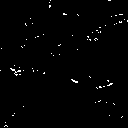

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

#大津の二値化
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
out = gray.astype(np.float32)

max_sigma = 0
max_t = 0
for _t in range(1, 255):
    v0 = out[np.where(out < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0  = len(v0) / (H * W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * (m0 - m1) ** 2
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

##二値化
print("threshold = " +  str(max_t))
th = max_t
out[out < th] = 0
out[out >= th] = 255

#オープニング処理

#モルフォロジー処理
dil_time = 3
ero_time = 3
MF = np.array(((0, 1, 0), 
                       (1, 0, 1),
                       (0, 1, 0)), dtype=np.int)


# Morphology - dilate
Dil_time = 3
mor = out.copy()

for i in range(Dil_time):
    tmp = np.pad(out, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mor[y-1, x-1] = 255

# Morphology - erode
Erode_time = 3

for i in range(Erode_time):
    tmp = np.pad(mor, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mor[y-1, x-1] = 0

out = mor - out


cv2_imshow(out)

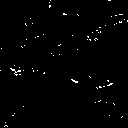

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Otsu binary
## Grayscale
out = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
out = out.astype(np.uint8)

## Determine threshold of Otsu's binarization
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = out[np.where(out < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

## Binarization
#print("threshold >>", max_t)
th = max_t
out[out < th] = 0
out[out >= th] = 255

# Morphology filter
MF = np.array(((0, 1, 0),
                       (1, 0, 1),
                       (0, 1, 0)), dtype=np.int)
mor = out.copy()

# Morphology - dilate
Dil_time = 3

for i in range(Dil_time):
    tmp = np.pad(out, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mor[y-1, x-1] = 255

# Morphology - erode
Erode_time = 3

for i in range(Erode_time):
    tmp = np.pad(mor, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mor[y-1, x-1] = 0

out = mor - out

cv2_imshow(out)

#54 テンプレートマッチング SSD



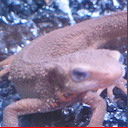

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)
H ,W, C = img.shape

temp = cv2.imread("imori_part.jpg").astype(np.float32)
cv2_imshow(temp)
Ht, Wt, Ct = img.shape

i, j = -1, -1
v = 255 * H * W * C
for y in range(H-Ht):
    for x in range(W-Wt):
        _v = np.sum((img[y:y+Ht, x:x+Wt] - temp) ** 2)
        if _v < v:
            v = _v
            i, j = x, y


out = img.copy()
cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
out = out.astype(np.uint8)


cv2_imshow(out)

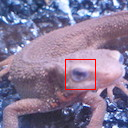

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Read templete image
temp = cv2.imread("imori_part.jpg").astype(np.float32)
Ht, Wt, Ct = temp.shape


# Templete matching
i, j = -1, -1
v = 255 * H * W * C
for y in range(H-Ht):
    for x in range(W-Wt):
        _v = np.sum((img[y:y+Ht, x:x+Wt] - temp) ** 2)
        if _v < v:
            v = _v
            i, j = x, y

out = img.copy()
cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
out = out.astype(np.uint8)


#60 アルファブレンド
透過させた２枚の画像を重ね合わせる

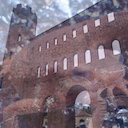

In [0]:
import cv2
import numpy as np

imori = cv2.imread("imori.jpg").astype(np.float32)
thorino = cv2.imread("thorino.jpg").astype(np.float32)

a = 0.5
out = imori * a + thorino * (1 - a)
out = out.astype(np.uint8)

cv2_imshow(out)